In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
diabetes = pd.read_csv('diabetes_data.csv')
diabetes


glucose  chol/hdl_ratio  age  gender   bmi  systolic_bp  diastolic_bp  \
0         77             3.9   19       1  22.5          118            70   
1         79             3.6   19       1  26.4          108            58   
2         75             4.0   20       1  29.3          110            72   
3         97             3.2   20       1  19.6          122            64   
4         91             2.4   20       1  20.2          122            86   
..       ...             ...  ...     ...   ...          ...           ...   
385      105             5.2   83       1  25.2          150            90   
386      279             4.3   84       1  37.5          144            88   
387       90             2.6   89       1  21.7          218            90   
388      184             2.0   91       1  24.0          170            82   
389       94             2.4   92       1  39.7          160            82   

     waist/hip_ratio  diabetes  
0               0.84         0  
1               0.83         0  
2               0.89         0  
3               0.79         0  
4               0.82         0  
..               ...       ...  
385             0.88         0  
386             0.85         1  
387             0.76         0  
388             0.92         1  
389             1.00         0  

[390 rows x 9 columns]

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   glucose          390 non-null    int64  
 1   chol/hdl_ratio   390 non-null    float64
 2   age              390 non-null    int64  
 3   gender           390 non-null    int64  
 4   bmi              390 non-null    float64
 5   systolic_bp      390 non-null    int64  
 6   diastolic_bp     390 non-null    int64  
 7   waist/hip_ratio  390 non-null    float64
 8   diabetes         390 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 27.6 KB


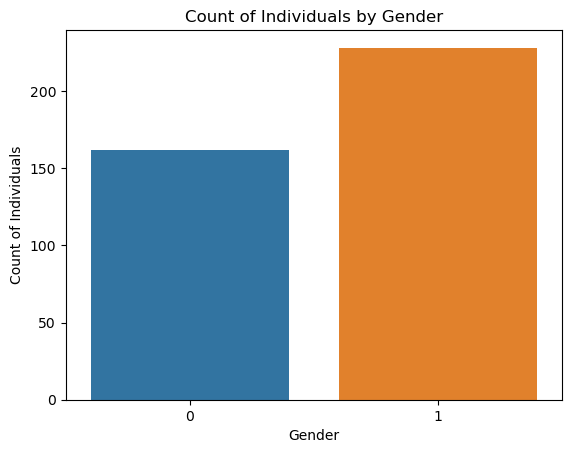

1    228
0    162
Name: gender, dtype: int64

In [4]:
sns.countplot(x='gender', data=diabetes)
plt.title('Count of Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Individuals')
plt.show()
diabetes["gender"].value_counts()

In [5]:
sns.countplot(x='diabetes', data=diabetes)
plt.show()
diabetes["diabetes"].value_counts()

0    330
1     60
Name: diabetes, dtype: int64

In [6]:
sns.set(style='whitegrid')
sns.countplot(x='gender', hue='diabetes', data=diabetes)

plt.title('Relation between Gender and Diabetes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [7]:
sns.histplot(diabetes['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

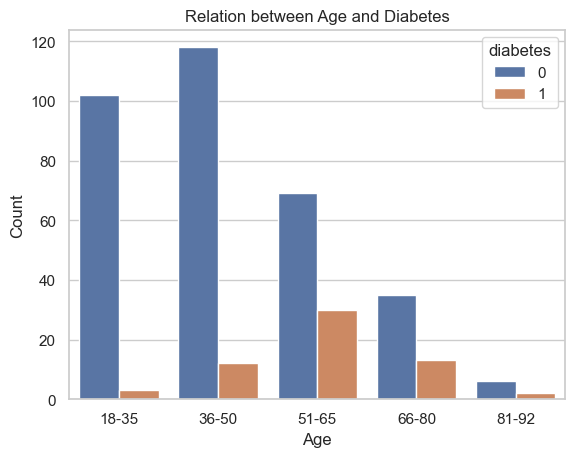

In [8]:
diabetes['Age_Category'] = pd.cut(diabetes['age'], bins=[17, 35, 50, 65, 80, 92], labels=['18-35', '36-50', '51-65', '66-80', '81-92'])

sns.set(style='whitegrid')

sns.countplot(x='Age_Category', hue='diabetes', data=diabetes)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Relation between Age and Diabetes')
plt.show()

In [9]:
#Countplot - BMI Distribution by Category
bmi_categories = { 'Underweight': (-float('inf'), 18.5), 
                    'Normal':(18.5, 24.9),
                    'Overweight': (24.9, float('inf'))
                 }
diabetes['bmi_category'] = pd.cut(diabetes['bmi'], bins=[bmi_categories[cat][0] for cat in bmi_categories.keys()] + [float('inf')], labels=bmi_categories.keys())

sns.set(style='whitegrid')
sns.countplot(x='bmi_category', data=diabetes, order=bmi_categories.keys())

plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution by Category')
plt.show()

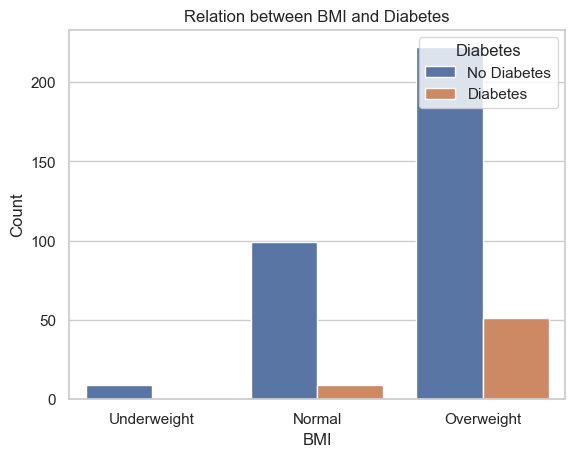

In [10]:
#Relation between BMI and Diabetes
bmi_categories = { 'Underweight': (-float('inf'), 18.5), 
                    'Normal':(18.5, 24.9),
                    'Overweight': (24.9, float('inf'))
                 }
diabetes['bmi_category'] = pd.cut(diabetes['bmi'], bins=[bmi_categories[cat][0] for cat in bmi_categories.keys()] + [float('inf')], labels=bmi_categories.keys())

sns.set(style='whitegrid')
sns.countplot(x='bmi_category', hue='diabetes', data=diabetes, order=bmi_categories.keys())

plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Relation between BMI and Diabetes')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes', 'Diabetes'])

plt.show()

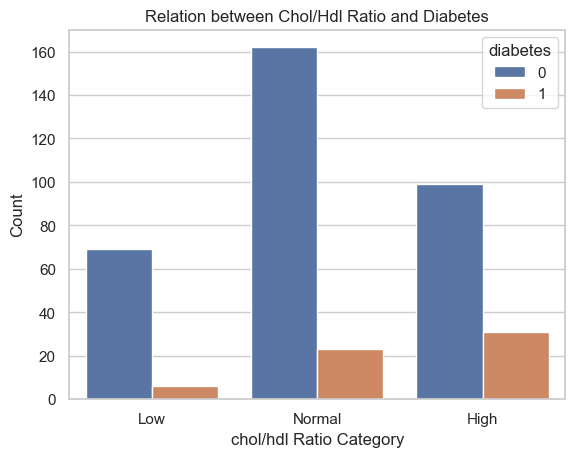

In [11]:
diabetes['chol/hdl_ratio'] = pd.cut(diabetes['chol/hdl_ratio'], bins=[-float('inf'), 3.0, 5.0, float('inf')], labels=['Low', 'Normal', 'High'])
sns.set(style='whitegrid')
sns.countplot(x='chol/hdl_ratio', hue='diabetes', data=diabetes)

plt.xlabel('chol/hdl Ratio Category')
plt.ylabel('Count')
plt.title('Relation between Chol/Hdl Ratio and Diabetes')

plt.show()

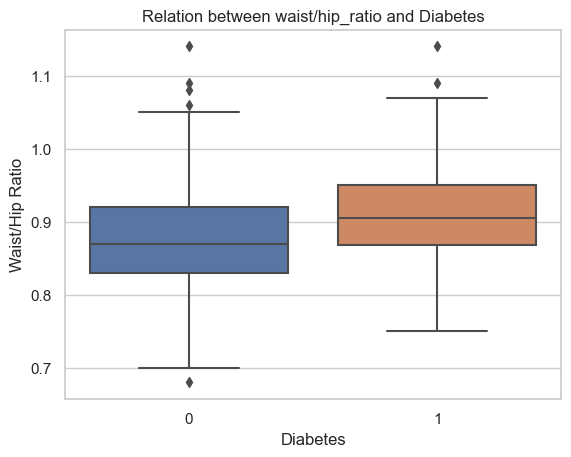

In [12]:
sns.boxplot(x='diabetes', y='waist/hip_ratio', data=diabetes)

plt.xlabel('Diabetes')
plt.ylabel('Waist/Hip Ratio')
plt.title('Relation between waist/hip_ratio and Diabetes')


plt.show()


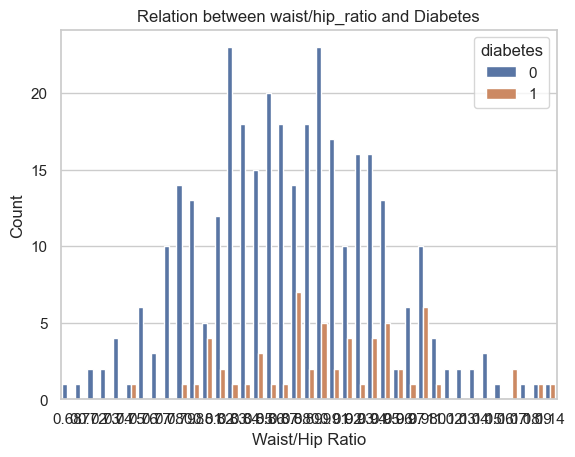

In [13]:
sns.countplot(x='waist/hip_ratio', hue='diabetes', data=diabetes)

plt.xlabel('Waist/Hip Ratio')
plt.ylabel('Count')
plt.title('Relation between waist/hip_ratio and Diabetes')


plt.show()

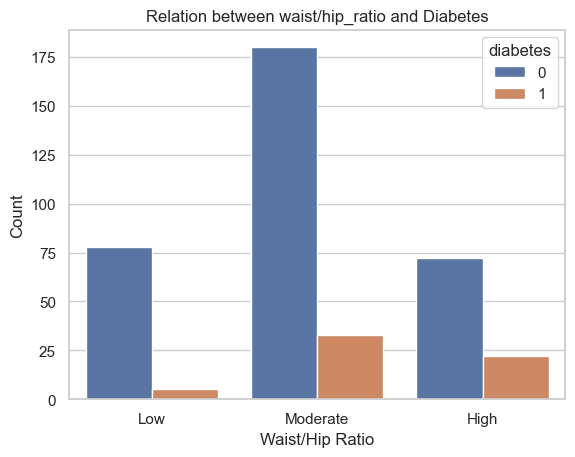

In [14]:
limits_waist_hip_female = [0, 0.8, 0.9, float('inf')]
limits_waist_hip_male = [0, 0.85, 0.95, float('inf')]

labels_waist_hip = ['Low', 'Moderate', 'High']


diabetes['waist/hip_ratio_category'] = diabetes.apply(
    lambda row: pd.cut([row['waist/hip_ratio']], bins=limits_waist_hip_female if row['gender'] == 1 else limits_waist_hip_male, 
                       labels=labels_waist_hip)[0], axis=1
)
order = ['Low', 'Moderate', 'High']
sns.countplot(x='waist/hip_ratio_category', hue='diabetes', data=diabetes, hue_order=[0, 1], order=order)

plt.xlabel('Waist/Hip Ratio')
plt.ylabel('Count')
plt.title('Relation between waist/hip_ratio and Diabetes')


plt.show()

In [15]:
diabetes

glucose chol/hdl_ratio  age  gender   bmi  systolic_bp  diastolic_bp  \
0         77         Normal   19       1  22.5          118            70   
1         79         Normal   19       1  26.4          108            58   
2         75         Normal   20       1  29.3          110            72   
3         97         Normal   20       1  19.6          122            64   
4         91            Low   20       1  20.2          122            86   
..       ...            ...  ...     ...   ...          ...           ...   
385      105           High   83       1  25.2          150            90   
386      279         Normal   84       1  37.5          144            88   
387       90            Low   89       1  21.7          218            90   
388      184            Low   91       1  24.0          170            82   
389       94            Low   92       1  39.7          160            82   

     waist/hip_ratio  diabetes Age_Category bmi_category  \
0               0.84         0        18-35       Normal   
1               0.83         0        18-35   Overweight   
2               0.89         0        18-35   Overweight   
3               0.79         0        18-35       Normal   
4               0.82         0        18-35       Normal   
..               ...       ...          ...          ...   
385             0.88         0        81-92   Overweight   
386             0.85         1        81-92   Overweight   
387             0.76         0        81-92       Normal   
388             0.92         1        81-92       Normal   
389             1.00         0        81-92   Overweight   

    waist/hip_ratio_category  
0                   Moderate  
1                   Moderate  
2                   Moderate  
3                        Low  
4                   Moderate  
..                       ...  
385                 Moderate  
386                 Moderate  
387                      Low  
388                     High  
389                     High  

[390 rows x 12 columns]

In [16]:
sns.boxplot(x='diabetes', y='systolic_bp', data=diabetes)

plt.xlabel('Diabetes')
plt.ylabel('systolic_bp')
plt.title('Relation between systolic_bp and Diabetes')


plt.show()

In [17]:
diabetes[['diastolic_bp', 'systolic_bp']]

diastolic_bp  systolic_bp
0              70          118
1              58          108
2              72          110
3              64          122
4              86          122
..            ...          ...
385            90          150
386            88          144
387            90          218
388            82          170
389            82          160

[390 rows x 2 columns]

row by row
if diastolic =< 80 : Normal
elif diastolic > 80 and diastolic <=89: Elevated
elif diastolic > 89: hypertension

if systolic =< 120 : Normal
elif systolic > 120 and diastolic <=129: Elevated
elif systolic > 129: hypertension

In [19]:
diabetes['bp_category'].value_counts()

(130.0, inf]      221
(80.0, 120.0]      95
(120.0, 130.0]     74
Name: bp_category, dtype: int64

In [21]:
sns.boxplot(x='diabetes', y='diastolic_bp', data=diabetes)

plt.xlabel('Diabetes')
plt.ylabel('diastolic_bp')
plt.title('Relation between diastolic_bp and Diabetes')

plt.show()

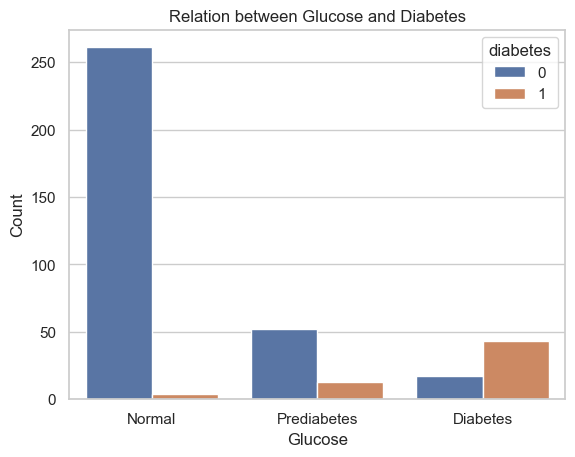

In [22]:
limits_glucose = [0, 100, 125, float('inf')]
labels_glucose = ['Normal', 'Prediabetes', 'Diabetes']


diabetes['glucose_category'] = diabetes.apply(
    lambda row: pd.cut([row['glucose']], bins=limits_glucose, labels=labels_glucose)[0], axis=1
)

order_glucose = ['Normal', 'Prediabetes', 'Diabetes']

sns.countplot(x='glucose_category', hue='diabetes', data=diabetes, hue_order=[0, 1], order=order_glucose)

plt.xlabel('Glucose')
plt.ylabel('Count')
plt.title('Relation between Glucose and Diabetes')


plt.show()

In [23]:
diabetes = pd.read_excel('Diabetes_Classification.xlsx')
diabetes

Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio  Age  \
0                 1          193       77        49             3.9   19   
1                 2          146       79        41             3.6   19   
2                 3          217       75        54             4.0   20   
3                 4          226       97        70             3.2   20   
4                 5          164       91        67             2.4   20   
..              ...          ...      ...       ...             ...  ...   
385             386          227      105        44             5.2   83   
386             387          226      279        52             4.3   84   
387             388          301       90       118             2.6   89   
388             389          232      184       114             2.0   91   
389             390          165       94        69             2.4   92   

     Gender  Height  Weight   BMI  Systolic BP  Diastolic BP  waist  hip  \
0    female      61     119  22.5          118            70     32   38   
1    female      60     135  26.4          108            58     33   40   
2    female      67     187  29.3          110            72     40   45   
3    female      64     114  19.6          122            64     31   39   
4    female      70     141  20.2          122            86     32   39   
..      ...     ...     ...   ...          ...           ...    ...  ...   
385  female      59     125  25.2          150            90     35   40   
386  female      60     192  37.5          144            88     41   48   
387  female      61     115  21.7          218            90     31   41   
388  female      61     127  24.0          170            82     35   38   
389  female      62     217  39.7          160            82     51   51   

     Waist/hip ratio     Diabetes  Unnamed: 16  Unnamed: 17  
0               0.84  No diabetes          6.0          6.0  
1               0.83  No diabetes          NaN          NaN  
2               0.89  No diabetes          NaN          NaN  
3               0.79  No diabetes          NaN          NaN  
4               0.82  No diabetes          NaN          NaN  
..               ...          ...          ...          ...  
385             0.88  No diabetes          NaN          NaN  
386             0.85     Diabetes          NaN          NaN  
387             0.76  No diabetes          NaN          NaN  
388             0.92     Diabetes          NaN          NaN  
389             1.00  No diabetes          NaN          NaN  

[390 rows x 18 columns]

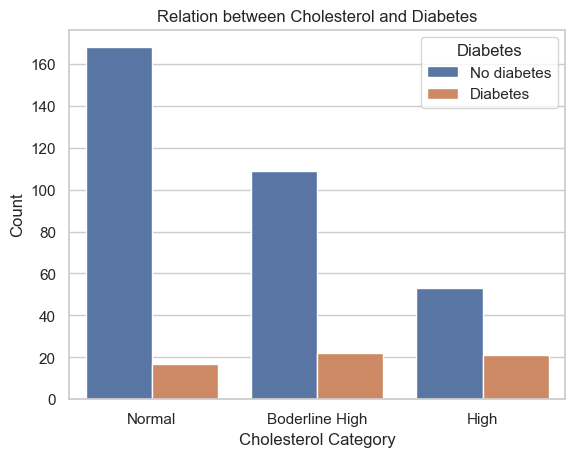

In [24]:
#Cholesterol

diabetes['cholesterol_category'] = pd.cut(diabetes['Cholesterol'], bins=[-float('inf'), 200, 240, float('inf')], labels=['Normal', 'Boderline High', 'High'])

sns.set(style='whitegrid')
sns.countplot(x='cholesterol_category', hue='Diabetes', data=diabetes)

plt.xlabel('Cholesterol Category')
plt.ylabel('Count')
plt.title('Relation between Cholesterol and Diabetes')


plt.show()

In [25]:
#diabetes.to_csv('diabetes_data_graphics.csv', index=False)

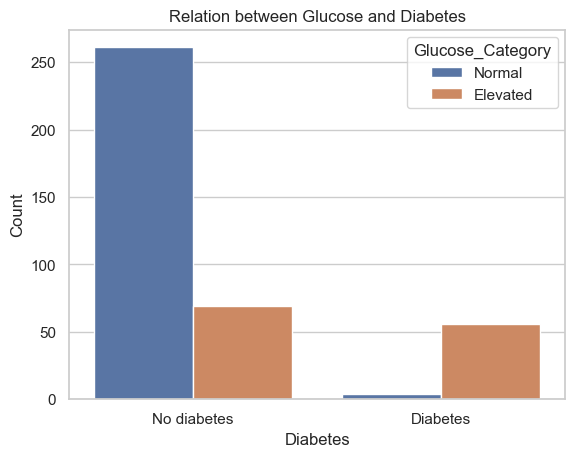

In [27]:
def categorize_glucose(glucose_level):
    if glucose_level <= 100:
        return 'Normal'
    else:
        return 'Elevated'

diabetes['Glucose_Category'] = diabetes['Glucose'].apply(categorize_glucose)
sns.set(style='whitegrid')
sns.countplot(x='Diabetes', hue='Glucose_Category', data=diabetes)

plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Relation between Glucose and Diabetes')


plt.show()